# Abeles reflectivity calculation functions
**(MD2reflect version 0.15)**

In [1]:
# Run this cell if this notebook is in another folder than the module
import sys
sys.path.append("..")

In [2]:
import numpy as np
import matplotlib.pyplot

In [3]:
import md2reflect

In [4]:
# q points where we want to evaluate R (Angstrom^-1)
q = np.linspace(0,.1,1000)  

# The scattering lenght density needs to be defined for all regions of the system:
# starting from the atmosphere (or vacuum) sld = 0
# then the topmost layer (sld = 2e-6)
# eventually the substrate (sld = 3e-6)
sld = np.array([0,2e-6, 3e-6])

# sld_abs is the imaginary part of the sld and describes the absorption, here we consider it to be zero.
# !! this vector needs to have the same shape as sld
sld_abs = sld* 0

# The rougnhess of each interface is given in the same order:
# atmosphere- first layer sigma = 2
# first layer_ substrate sigma = 1
# !! the vector needs to be of dtype float, so at least one of the data should be input as float
roughness = np.array([2,1.])  

# The thickness of all parts of the system (incl atm=0 and sub=p.inf)
thickness = np.array([0, 200., np.inf])

In [5]:
# Theoretical reflectivity
theory = md2reflect.theoretical_reflectivity(q,
                                  sld,
                                  sld*0,
                                  thickness,
                                  roughness
                                  )

# Reflectivity affected by a constant dq_q resolution (as at a TOF reflectometer using optically blind choppers)
# and a purposefully high background
cst_dq_q = md2reflect.simul_reflect_meas_cst_dq_q(q,
                                       sld,
                                       sld*0,
                                       thickness,
                                       roughness,
                                       dq_q=.06,
                                       bckg= 5e-6
                                       )

# Reflectivity as measured at a monochromatic instrument
monochr = md2reflect.simul_reflect_meas_monochr(q,
                                            sld,
                                            sld*0,
                                            thickness,
                                            roughness,
                                            wl = 1,
                                            dwl=.03,
                                            dtheta=.005,
                                            bckg= 5e-6
                                           )

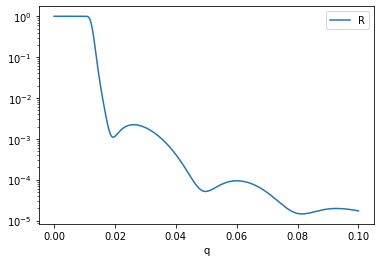

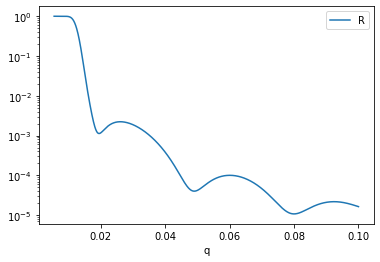

In [6]:
import pandas as pd
data_cst_dq_q = pd.DataFrame({"q": q, "R": cst_dq_q})
data_monochr = pd.DataFrame({"q": q, "R": monochr})

data_cst_dq_q.plot("q", "R", logy=True)
data_monochr.plot("q", "R", logy=True)

data_cst_dq_q.to_csv("cst_dq_q.csv", index=False)
data_monochr.to_csv("monochr.csv", index=False)

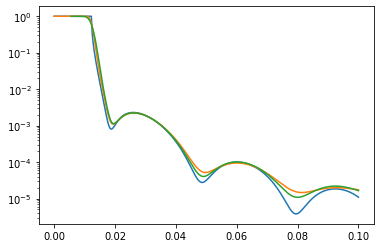

In [7]:
matplotlib.pyplot.figure()
matplotlib.pyplot.semilogy(q, theory, label="theory")
matplotlib.pyplot.semilogy(q, cst_dq_q, label = "cst_dq_q")
matplotlib.pyplot.semilogy(q, monochr, label='monochr')

----